In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 

# Short Term Predictions Visualization(March - May all 3 years)

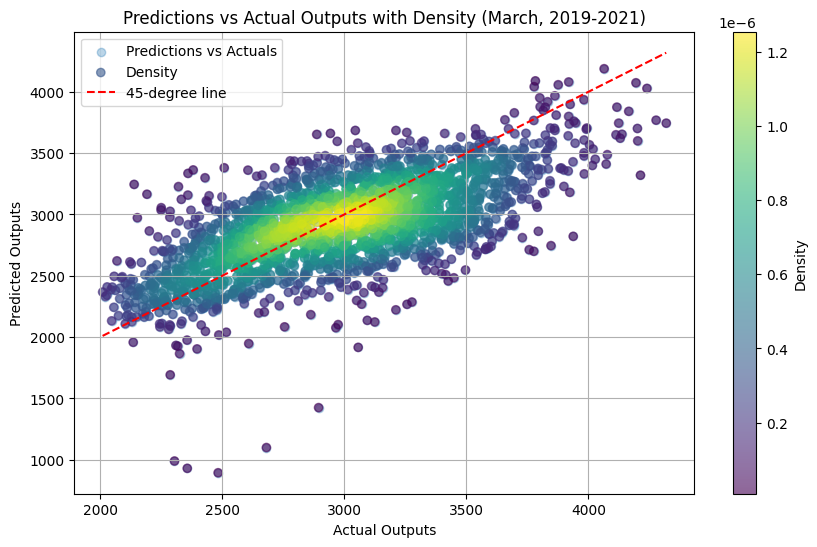

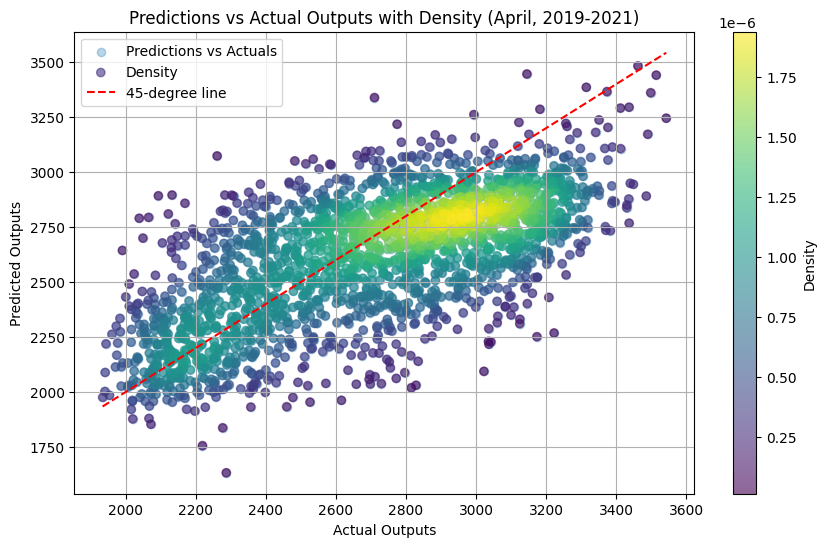

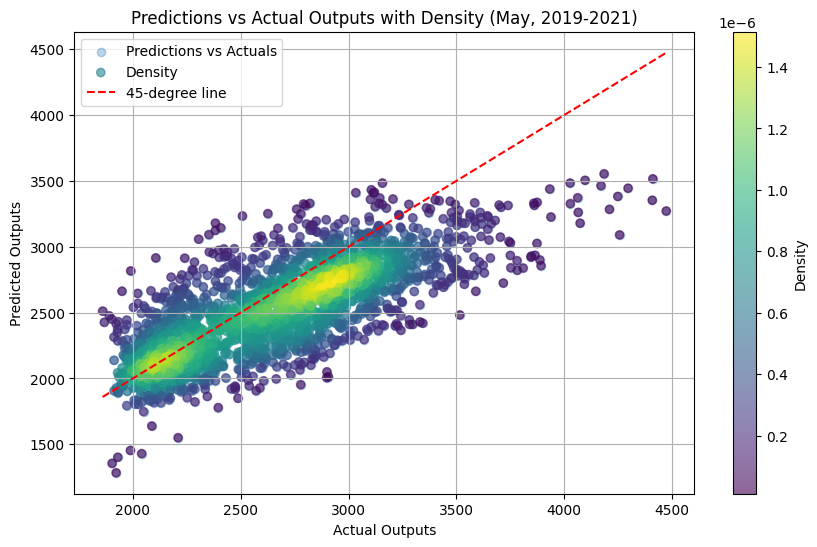

In [2]:
from scipy.stats import gaussian_kde
# Load the data into DataFrames
actuals_short = pd.read_csv("TestingActual.csv")
predictions_short = pd.read_csv("TestingPredictions.csv")
# Extract dates from the column headers
actuals_short.columns = pd.to_datetime(
    actuals_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_short.columns = pd.to_datetime(
    predictions_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
# Filter columns for dates between March and May over three years
valid_months = [3, 4, 5]
valid_years = [2019, 2020, 2021]
filtered_columns = [
    col for col in actuals_short.columns if col.month in valid_months and col.year in valid_years
]
# Subset the data
filtered_actuals_short = actuals_short[filtered_columns]
filtered_predictions_short = predictions_short[filtered_columns]
# Function to create combined scatter and density plots for each month
def plot_monthly_comparison_with_density(actuals, predictions, month, years):
    plt.figure(figsize=(10, 6))
    all_actuals = []
    all_predictions = []
    for year in years:
        filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
        monthly_actuals = actuals[filtered_cols].values.flatten()
        monthly_predictions = predictions[filtered_cols].values.flatten()
        
        mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
        monthly_actuals = monthly_actuals[mask]
        monthly_predictions = monthly_predictions[mask]
        
        # Accumulate data for the overall scatter plot
        all_actuals.extend(monthly_actuals)
        all_predictions.extend(monthly_predictions)
    
    all_actuals = np.array(all_actuals)
    all_predictions = np.array(all_predictions)
    
    plt.scatter(all_actuals, all_predictions, alpha=0.3, label="Predictions vs Actuals")
    
    # Density plot
    xy = np.vstack([all_actuals, all_predictions])
    density = gaussian_kde(xy)(xy)
    plt.scatter(all_actuals, all_predictions, c=density, cmap='viridis', alpha=0.6, label="Density")
    
    # Add a 45-degree line
    plt.plot([all_actuals.min(), all_actuals.max()],
             [all_actuals.min(), all_actuals.max()],
             color='red', linestyle='--', label="45-degree line")
    
    # Labels and title
    month_name = pd.to_datetime(f"2022-{month}-01").strftime('%B')  # Convert month number to name
    plt.xlabel("Actual Outputs")
    plt.ylabel("Predicted Outputs")
    plt.title(f"Predictions vs Actual Outputs with Density ({month_name}, 2019-2021)")
    plt.colorbar(label="Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate combined plots for March, April, and May
for month in [3, 4, 5]:
    plot_monthly_comparison_with_density(filtered_actuals_short, filtered_predictions_short, month, valid_years)


# Long Term Predictions Visualization(March - May all 3 years)

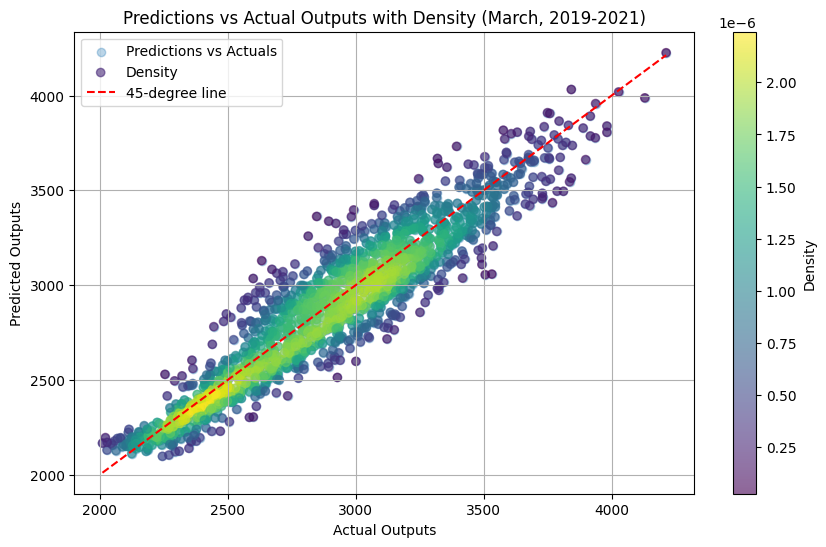

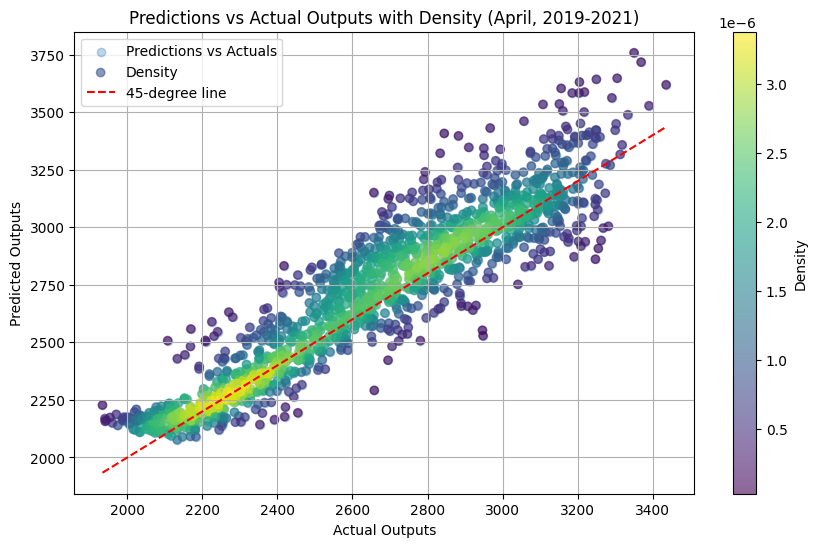

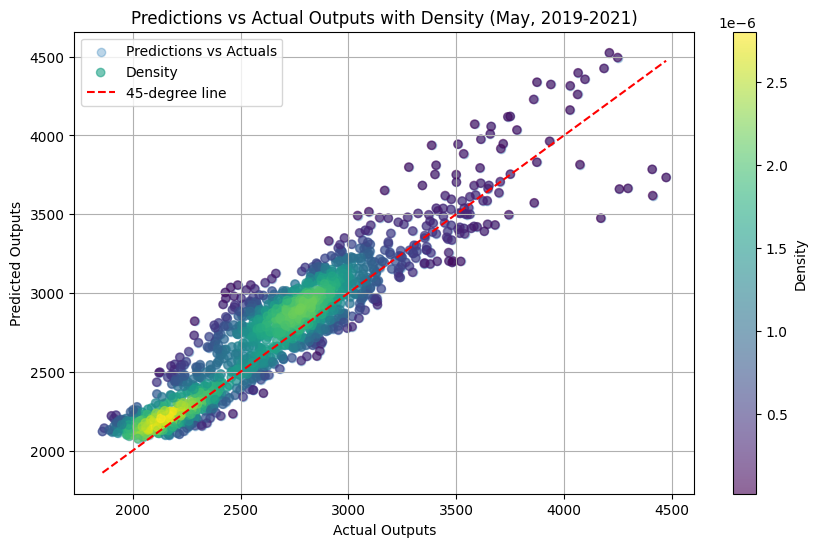

In [3]:
actuals_long = pd.read_csv("/home/jik19004/FilesToRun/BayesianBiDirectional/TestingLong/TestingActual_long.csv")
predictions_long = pd.read_csv("/home/jik19004/FilesToRun/BayesianBiDirectional/TestingLong/TestingPredictionsLong.csv")
# Extract dates from the column headers
actuals_long.columns = pd.to_datetime(
    actuals_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_long.columns = pd.to_datetime(
    predictions_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)

valid_months = [3, 4, 5]
valid_years = [2019, 2020, 2021]
filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]


valid_months = [3, 4, 5]
valid_years = [2019, 2020, 2021]
filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

# Subset the data
filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]

for month in [3, 4, 5]:
    plot_monthly_comparison_with_density(filtered_actuals_long, filtered_predictions_long, month, valid_years)


# Calculate the R^{2} coefficient for short and long term: 

In [4]:
from sklearn.metrics import r2_score

# Function to calculate R^2 for each month across the specified years
def calculate_r2(actuals, predictions, month, years):
    all_actuals = []
    all_predictions = []
    
    for year in years:
        # Filter data for the specific month and year
        filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
        monthly_actuals = actuals[filtered_cols].values.flatten()
        monthly_predictions = predictions[filtered_cols].values.flatten()
        # Remove NaN values
        mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
        monthly_actuals = monthly_actuals[mask]
        monthly_predictions = monthly_predictions[mask]
        # Accumulate data for the overall calculation
        all_actuals.extend(monthly_actuals)
        all_predictions.extend(monthly_predictions)
    # Calculate R^2 score
    all_actuals = np.array(all_actuals)
    all_predictions = np.array(all_predictions)
    return r2_score(all_actuals, all_predictions)
# Calculate R^2 for March, April, and May
r2_scores = {}
for month in [3, 4, 5]:
    r2_scores[month] = calculate_r2(filtered_actuals_short, filtered_predictions_short, month, valid_years)

# Display the R^2 scores for each month
r2_scores = {pd.to_datetime(f"2022-{month}-01").strftime('%B'): r2 for month, r2 in r2_scores.items()}
print("Short Term R^2 coefficient:")
r2_scores

Short Term R^2 coefficient:


{'March': 0.3939243913489532,
 'April': 0.35896577216515446,
 'May': 0.4551729721350847}

In [5]:
r2_scores = {}
for month in [3, 4, 5]:
    r2_scores[month] = calculate_r2(filtered_actuals_long, filtered_predictions_long, month, valid_years)
# Display the R^2 scores for each month
r2_scores = {pd.to_datetime(f"2022-{month}-01").strftime('%B'): r2 for month, r2 in r2_scores.items()}
print("Long Term R^2 coefficient:")
r2_scores

Long Term R^2 coefficient:


{'March': 0.8709280492730234,
 'April': 0.8066346743389954,
 'May': 0.8319926123075971}